In [23]:
import numpy as np
import time
from data_loader import MNISTLoader
from metrics import Metrics
from logistic_regression import MultiClassLogisticRegression
from mlp_classifier import MLP
from knn_classifier import KNNClassifier
from decision_tree import DecisionTree

Loading and preprocessing data...
Loading MNIST dataset...
Dataset loaded successfully!
Data preprocessing completed!


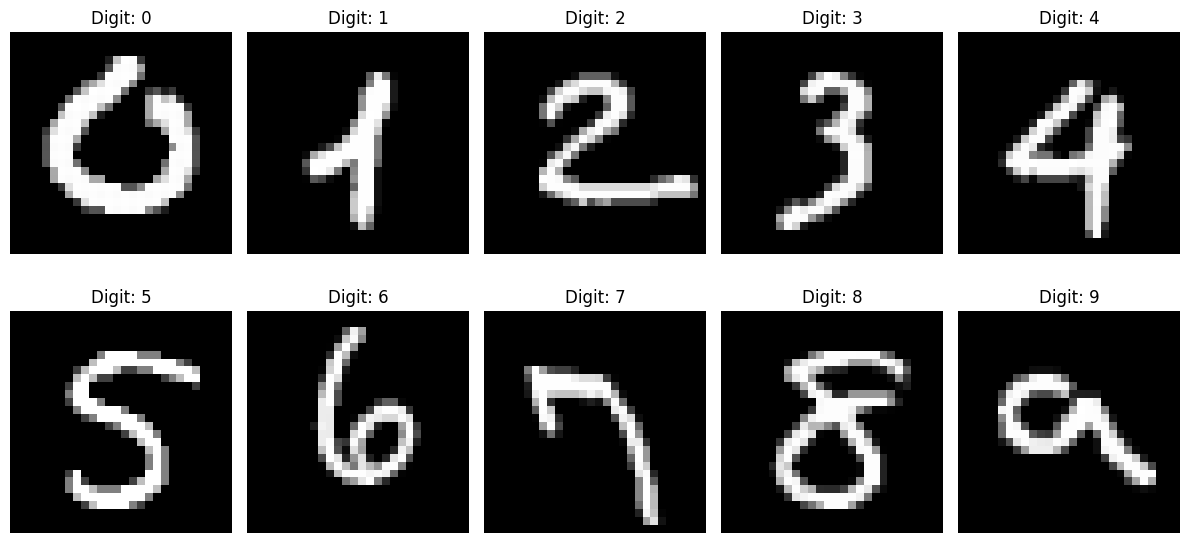

Data ready!


In [2]:
print("Loading and preprocessing data...")
loader = MNISTLoader()
loader.load_data()
X_train, X_test, y_train, y_test = loader.preprocess()
loader.visualize_samples()
print("Data ready!")

In [3]:
metrics = Metrics(n_classes=10)
results = {}


Training Logistic Regression...
Epoch 100/1000, Loss: 0.2727, Accuracy: 0.9243
Epoch 200/1000, Loss: 0.2587, Accuracy: 0.9289
Epoch 300/1000, Loss: 0.2519, Accuracy: 0.9310
Epoch 400/1000, Loss: 0.2476, Accuracy: 0.9324
Epoch 500/1000, Loss: 0.2445, Accuracy: 0.9334
Epoch 600/1000, Loss: 0.2421, Accuracy: 0.9340
Epoch 700/1000, Loss: 0.2402, Accuracy: 0.9350
Epoch 800/1000, Loss: 0.2387, Accuracy: 0.9351
Epoch 900/1000, Loss: 0.2374, Accuracy: 0.9356
Epoch 1000/1000, Loss: 0.2362, Accuracy: 0.9359


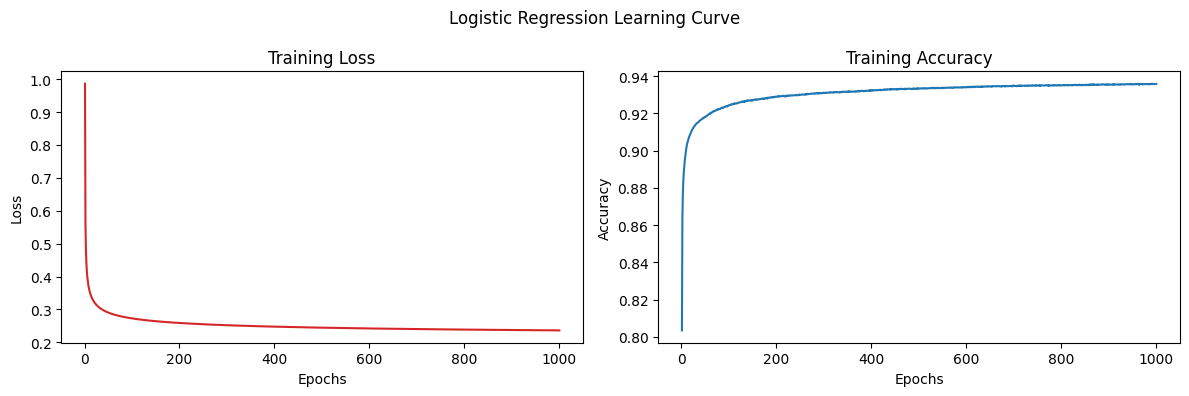

In [28]:
print("\nTraining Logistic Regression...")
logistic_model = MultiClassLogisticRegression(n_features=784, n_classes=10, learning_rate=0.01, reg_lambda=0.00001)
start_time = time.time()
logistic_loss, logistic_acc = logistic_model.fit(X_train, y_train, epoch=1000, batch_size=64)
train_time = time.time() - start_time
logistic_model.plot_learning_curve(logistic_loss, logistic_acc, title='Logistic Regression Learning Curve')
#92.46


Logistic Regression Results:
{'accuracy': 0.9226428571428571, 'precision': [0.9573699421965318, 0.9502125075895568, 0.9206117989803351, 0.8999290276792051, 0.9286229271809661, 0.8897893030794165, 0.9462599854756718, 0.9475920679886686, 0.8795355587808418, 0.8977841315225161], 'recall': [0.9636363636363636, 0.9702417854928704, 0.8939179632248939, 0.8967468175388967, 0.9442815249266863, 0.8679841897233201, 0.9580882352941177, 0.9363191042687193, 0.8814545454545455, 0.9029475197699497], 'f1_scores': [0.9604929322218194, 0.9601226993865032, 0.9070685324721924, 0.8983351044987602, 0.9363867684478372, 0.8787515006002401, 0.9521373766898064, 0.941921858500528, 0.8804940065383219, 0.9003584229390681], 'macro_f1': 0.9216069202295076, 'weighted_f1': 0.9225028308863099, 'confusion_matrix': array([[1325,    0,    6,    5,    0,   15,    9,    3,    9,    3],
       [   0, 1565,    8,    4,    3,    4,    1,    4,   20,    4],
       [   8,   18, 1264,   31,   19,    7,   13,   14,   37,    3],
  

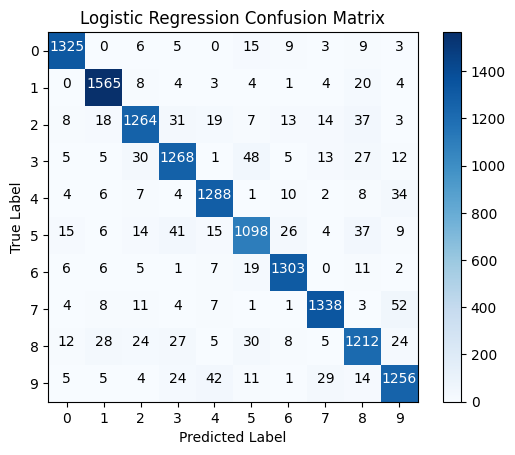

In [29]:
start_time = time.time()
logistic_predict = logistic_model.predict(X_test)
predict_time = time.time() - start_time

logistic_metrics = metrics.evaluate(y_test, logistic_predict)
results['Logistic Regression'] = {
    'metrics': logistic_metrics,
    'train_time': train_time,
    'predict_time': predict_time
}
print("\nLogistic Regression Results:")
print(logistic_metrics)
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")
metrics.plot_confusion_matrix(y_test, logistic_predict, title='Logistic Regression Confusion Matrix')
#91.85


Training MLP...
Epoch 100/1000, Loss: 0.1764, Accuracy: 0.9464
Epoch 200/1000, Loss: 0.1136, Accuracy: 0.9665
Epoch 300/1000, Loss: 0.0818, Accuracy: 0.9764
Epoch 400/1000, Loss: 0.0611, Accuracy: 0.9829
Epoch 500/1000, Loss: 0.0462, Accuracy: 0.9872
Epoch 600/1000, Loss: 0.0352, Accuracy: 0.9911
Epoch 700/1000, Loss: 0.0268, Accuracy: 0.9947
Epoch 800/1000, Loss: 0.0206, Accuracy: 0.9965
Epoch 900/1000, Loss: 0.0158, Accuracy: 0.9979
Epoch 1000/1000, Loss: 0.0123, Accuracy: 0.9988


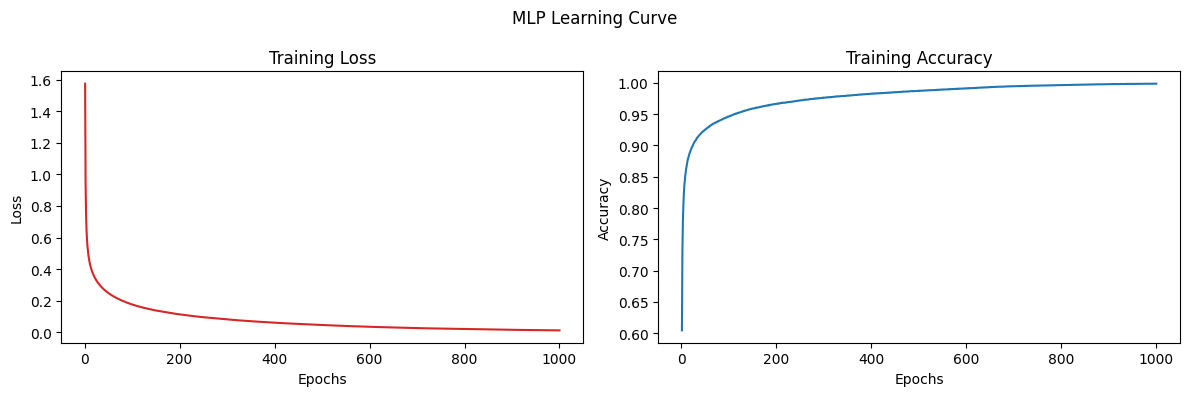

In [7]:
print("\nTraining MLP...")
mlp_model = MLP(input_size=784, hidden_sizes=[128, 64], output_size=10, learning_rate=0.1)
start_time = time.time()
mlp_loss, mlp_acc = mlp_model.fit(X_train, y_train, epoch=1000, batch_size=64)
train_time = time.time() - start_time
mlp_model.plot_learning_curve(mlp_loss, mlp_acc, title='MLP Learning Curve')


MLP Results:
{'accuracy': 0.9620714285714286, 'precision': [0.9773557341124909, 0.9819987585350713, 0.9602836879432625, 0.9507042253521126, 0.9662261380323054, 0.9577352472089314, 0.9679066374908826, 0.9657582110412299, 0.943519188993483, 0.9460819554277499], 'recall': [0.9730909090909091, 0.9807811531308122, 0.9575671852899575, 0.9547383309759547, 0.9648093841642229, 0.9494071146245059, 0.975735294117647, 0.967109867039888, 0.9476363636363636, 0.9460819554277499], 'f1_scores': [0.9752186588921283, 0.9813895781637717, 0.9589235127478754, 0.9527170077628793, 0.9655172413793104, 0.9535529972211194, 0.9718051995606005, 0.9664335664335664, 0.9455732946298983, 0.9460819554277499], 'macro_f1': 0.9617213012218901, 'weighted_f1': 0.9620734798739455, 'confusion_matrix': array([[1338,    0,    6,    4,    3,    5,    7,    0,    8,    4],
       [   0, 1582,    5,    3,    5,    2,    1,    5,    6,    4],
       [   4,    5, 1354,   16,    5,    2,    5,   11,   10,    2],
       [   1,    5, 

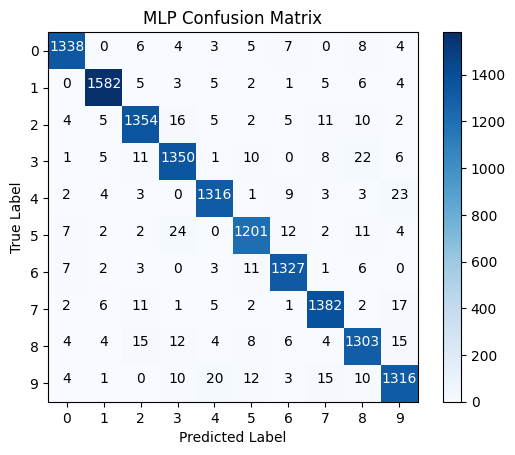

In [8]:
start_time = time.time()
mlp_predict = mlp_model.predict(X_test)
predict_time = time.time() - start_time

mlp_metrics = metrics.evaluate(y_test, mlp_predict)
results['MLP'] = {
    'metrics': mlp_metrics,
    'train_time': train_time,
    'predict_time': predict_time
}
print("\nMLP Results:")
print(mlp_metrics)
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")
metrics.plot_confusion_matrix(y_test, mlp_predict, title='MLP Confusion Matrix')

In [9]:
print("\nTraining KNN Classifier...")
knn_model = KNNClassifier(k=20)
start_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time


Training KNN Classifier...


In [10]:
start_time = time.time()
knn_neighbors = np.array([knn_model.find_neighbors(x) for x in X_test])


KNN Classifier Results:
{'accuracy': 0.9619285714285715, 'precision': [0.9694602272727273, 0.9302325581395349, 0.9917787742899851, 0.9576271186440678, 0.9731943410275503, 0.9717514124293786, 0.9725234996384671, 0.9518900343642611, 0.9828259172521467, 0.9308398023994354], 'recall': [0.9927272727272727, 0.9919404835709857, 0.9384724186704385, 0.958981612446959, 0.9582111436950147, 0.9517786561264822, 0.9889705882352942, 0.9692092372288313, 0.9156363636363636, 0.9482386772106398], 'f1_scores': [0.9809558030901905, 0.96009600960096, 0.9643895348837209, 0.958303886925795, 0.9656446250461767, 0.9616613418530352, 0.980678089682829, 0.9604715672676838, 0.9480421686746987, 0.9394586894586895], 'macro_f1': 0.961970171648378, 'weighted_f1': 0.9618828248385718, 'confusion_matrix': array([[1365,    1,    0,    0,    0,    1,    7,    0,    0,    1],
       [   0, 1600,    3,    2,    2,    0,    0,    3,    0,    3],
       [  17,   18, 1327,    6,    2,    1,    4,   30,    7,    2],
       [   1

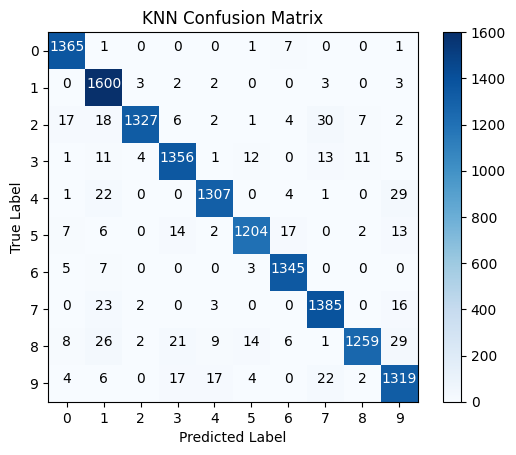

In [11]:
knn_predict = knn_model.predict(X_test, neighbors=list(knn_neighbors))
predict_time = time.time() - start_time

knn_metrics = metrics.evaluate(y_test, knn_predict)
results['KNN'] = {
    'metrics': knn_metrics,
    'train_time': train_time,
    'predict_time': predict_time
}
print("\nKNN Classifier Results:")
print(knn_metrics)
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")
metrics.plot_confusion_matrix(y_test, knn_predict, title='KNN Confusion Matrix')

In [12]:
print("\nEvaluating KNN with different k values...")
for k in [1, 3, 5, 7, 10, 15, 18, 20]:
    knn_nb = knn_neighbors[:, :k]
    knn_predict = knn_model.predict(X_test, neighbors=list(knn_nb))
    knn_acc = metrics.accuracy(y_test, knn_predict)
    print(f"K={k}: Accuracy={knn_acc:.4f}")


Evaluating KNN with different k values...
K=1: Accuracy=0.9707
K=3: Accuracy=0.9714
K=5: Accuracy=0.9700
K=7: Accuracy=0.9685
K=10: Accuracy=0.9662
K=15: Accuracy=0.9641
K=18: Accuracy=0.9631
K=20: Accuracy=0.9619


In [13]:
print("\nKNN with brute-force search:")
knn_model.set_params(k=20, algorithm='brute')
start_time = time.time()
knn_predict = knn_model.predict(X_test)
predict_time = time.time() - start_time
knn_acc = metrics.accuracy(y_test, knn_predict)
print(f"KNN with brute-force search: Accuracy={knn_acc:.4f}, Prediction time={predict_time:.4f} seconds")


KNN with brute-force search:
KNN with brute-force search: Accuracy=0.9619, Prediction time=10016.2475 seconds


In [14]:
print("\nTraining Decision Tree...")
dt_model = DecisionTree(max_depth=10)
start_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_time


Training Decision Tree...



Decision Tree Results:
{'accuracy': 0.8685, 'precision': [0.9299410029498525, 0.9367710251688153, 0.8509719222462203, 0.8060109289617486, 0.8885448916408669, 0.8070987654320988, 0.9010416666666666, 0.9058988764044944, 0.8612181958365459, 0.7939032471835653], 'recall': [0.9170909090909091, 0.9460632362058277, 0.8359264497878359, 0.8345120226308345, 0.841642228739003, 0.8268774703557312, 0.8904411764705882, 0.9027291812456263, 0.8123636363636364, 0.8612508986340762], 'f1_scores': [0.9234712559502014, 0.9413942011104257, 0.8433820906171958, 0.8200138985406532, 0.8644578313253012, 0.8168684107770403, 0.8957100591715975, 0.9043112513144058, 0.8360778443113773, 0.8262068965517241], 'macro_f1': 0.8671893739669922, 'weighted_f1': 0.86871643294184, 'confusion_matrix': array([[1261,    0,    9,   18,    4,   31,   24,    2,   14,   12],
       [   2, 1526,   20,   14,    3,   10,    2,   15,   17,    4],
       [  27,    8, 1182,   28,   21,   19,   28,   48,   41,   12],
       [   4,   14,   

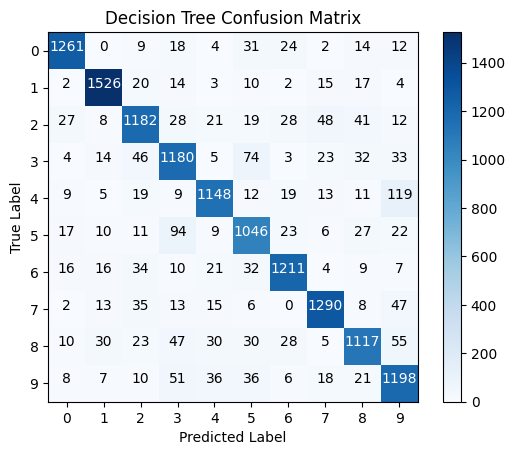

In [15]:
start_time = time.time()
dt_predict = dt_model.predict(X_test)
predict_time = time.time() - start_time

dt_metrics = metrics.evaluate(y_test, dt_predict)
results['Decision Tree'] = {
    'metrics': dt_metrics,
    'train_time': train_time,
    'predict_time': predict_time
}
print("\nDecision Tree Results:")
print(dt_metrics)
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")
metrics.plot_confusion_matrix(y_test, dt_predict, title='Decision Tree Confusion Matrix')

In [24]:
for depth in [5, 10, 15, 20, 25]:
    dt_model = DecisionTree(max_depth=depth)
    dt_model.fit(X_train, y_train)
    dt_predict = dt_model.predict(X_test)
    dt_acc = metrics.accuracy(y_test, dt_predict)
    print(f"Decision Tree with max_depth={depth}: Accuracy={dt_acc:.4f}")

Decision Tree with max_depth=5: Accuracy=0.6854
Decision Tree with max_depth=10: Accuracy=0.8685
Decision Tree with max_depth=15: Accuracy=0.8796
Decision Tree with max_depth=20: Accuracy=0.8785
Decision Tree with max_depth=25: Accuracy=0.8785
